In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from prince import PCA as prince_PCA  # Rename to avoid conflict with scikit-learn PCA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.cluster import AgglomerativeClustering

In [4]:
family = pd.read_csv('../../data/raw/illumina/Family-level microbiota.csv')
family.head(10)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Sphaerobacteraceae,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae
0,UAB 17001,46.4265,0.6828,0.0650,6.7373,1.8859,1.6713,5.1440,0.3967,0.0650,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
1,UAB 17002,1.6004,0.0081,0.0866,0.3201,1.4494,0.0000,0.5536,0.0000,0.1490,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
2,UAB 17003,41.8100,6.9997,5.5466,0.1772,0.4794,20.7520,1.4129,1.0206,0.1556,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
3,UAB 17004,19.7614,0.2237,0.8203,0.8203,6.4131,0.9694,6.7860,0.0000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
4,UAB 17005,49.7581,1.8944,10.5872,0.7384,8.2395,0.0611,7.7558,0.8453,0.1528,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
5,UAB 17006,61.8284,0.0064,6.0330,0.5749,3.2758,0.0064,8.3325,0.0128,0.0241,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
6,UAB 17007,0.2657,0.0079,23.4195,0.0053,30.6832,0.5117,4.0344,0.0184,1.6942,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
7,UAB 17008,51.0829,9.2802,0.0739,0.0012,1.2485,2.2524,1.1136,0.0829,0.0427,...,0.0012,0.0000,0.0,0.0004,0.0,0.0,0.0000,0.0004,0.0,0.0
8,UAB 17009,43.6255,0.7628,5.4540,0.0011,0.1193,9.9830,0.1464,0.1312,0.0910,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
9,UAB 17010,12.4375,0.0407,24.5607,12.8741,0.0477,2.8241,1.6057,1.4640,0.2456,...,0.0000,0.0014,0.0,0.0000,0.0,0.0,0.0014,0.0000,0.0,0.0


In [3]:
# Describe the statistical summary of the DataFrame.
family.describe()

,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,Veillonellaceae,...,Sphaerobacteraceae,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,32.102036,5.812498,4.799541,4.121246,3.825898,3.787212,3.272388,2.894602,2.608713,2.608511,...,0.000057,0.000054,0.000046,0.000046,0.000045,0.000045,0.000041,0.000039,0.000039,0.000037
std,20.070654,9.180485,6.936334,8.879530,6.779456,6.199744,4.501437,4.726574,9.324191,3.034740,...,0.000219,0.000222,0.000174,0.000180,0.000170,0.000256,0.000203,0.000245,0.000201,0.000243
min,0.011100,0.000000,0.000000,0.000000,0.000000,0.000000,0.021200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.110100,0.011850,0.056625,0.014925,0.183025,0.087500,0.193575,0.025350,0.034425,0.108375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.372600,0.868900,0.853650,0.287500,1.159250,0.898800,1.023000,0.571550,0.140850,0.919500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.391150,7.789350,5.876700,3.467100,4.204325,3.265300,5.268325,4.565900,0.674850,5.112225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.937300,36.337200,24.560700,42.279100,30.683200,21.057400,19.638600,21.208600,63.739100,12.531100,...,0.001200,0.001400,0.000800,0.001000,0.000800,0.001800,0.001400,0.001800,0.001400,0.001800


In [4]:
# check for any null values
family.isnull().sum()

Sample ID                0
Peptoniphilaceae         0
Campylobacteraceae       0
Streptococcaceae         0
Moraxellaceae            0
                        ..
Orbaceae                 0
Bernardetiaceae          0
Succinivibrionaceae      0
Sporolactobacillaceae    0
Gemmataceae              0
Length: 293, dtype: int64

In [5]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
family['fertility'] = family['Sample ID'].str.split(' ').str[0]

family_fertile = family[family['fertility'] == 'CON']
family_fertile.drop(['fertility'], axis=1, inplace=True)

family_infertile = family[family['fertility'] == 'UAB']
family_infertile.drop(['fertility'], axis=1, inplace=True)

/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8886/2781449399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_fertile.drop(['fertility'], axis=1, inplace=True)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8886/2781449399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_infertile.drop(['fertility'], axis=1, inplace=True)


In [6]:
family_fertile.head(5)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Sphaerobacteraceae,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae
42,CON 01,40.6698,6.9979,5.8246,0.1421,0.4372,21.0574,1.4536,0.9823,0.1848,...,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
43,CON 02,45.5873,0.9750,5.0132,0.0335,12.8133,0.0167,12.8594,0.9457,0.1255,...,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
44,CON 03,62.4929,0.0131,5.5379,0.3701,2.1507,0.0131,7.1357,0.3396,0.0218,...,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
45,CON 04,3.7242,8.2510,22.1804,0.0015,24.0002,0.3930,3.5791,1.9513,1.8833,...,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
46,CON 05,54.4879,8.5421,0.0801,0.0016,1.1434,2.2593,0.8238,0.0753,0.1052,...,0.0,0.0,0.0008,0.0,0.0008,0.0,0.0,0.0,0.0,0.0


In [7]:
family_infertile.head(5)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Sphaerobacteraceae,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae
0,UAB 17001,46.4265,0.6828,0.0650,6.7373,1.8859,1.6713,5.1440,0.3967,0.0650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UAB 17002,1.6004,0.0081,0.0866,0.3201,1.4494,0.0000,0.5536,0.0000,0.1490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UAB 17003,41.8100,6.9997,5.5466,0.1772,0.4794,20.7520,1.4129,1.0206,0.1556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UAB 17004,19.7614,0.2237,0.8203,0.8203,6.4131,0.9694,6.7860,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UAB 17005,49.7581,1.8944,10.5872,0.7384,8.2395,0.0611,7.7558,0.8453,0.1528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# shape of fertile and infertile df
print('Fertile: ', family_fertile.shape)
print('Infertile: ', family_infertile.shape)

Fertile:  (14, 293)
Infertile:  (42, 293)


## family fertile

### PCA

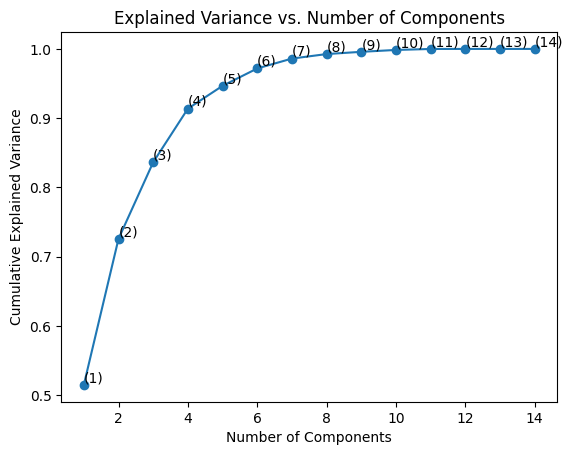

In [9]:
features = family_fertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [10]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=7)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

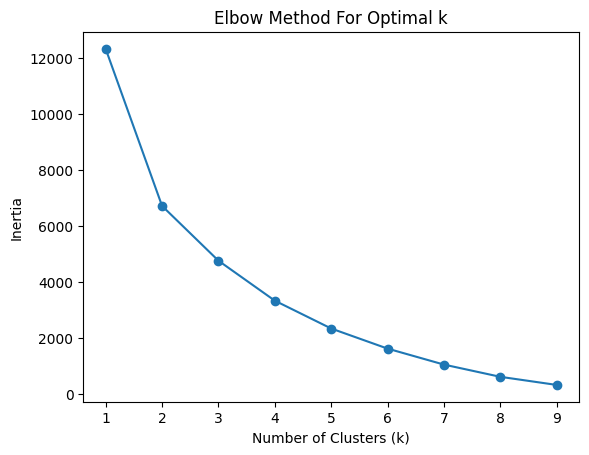

In [11]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8886/3560828703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_fertile['cluster'] = cluster_labels


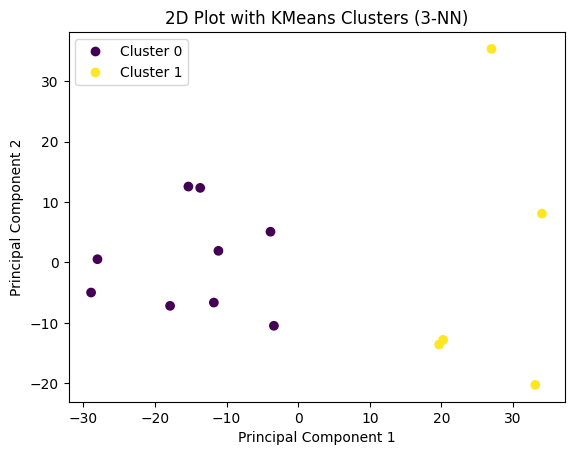

In [12]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
family_fertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [13]:
# see how many samples are in each cluster
family_fertile['cluster'].value_counts()

cluster
0    9
1    5
Name: count, dtype: int64

### KNN

In [14]:
# Assuming your data has cluster assignments in 'cluster' column
X = family_fertile.iloc[:, 1:]  # Features
y = family_fertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.3333333333333333
Confusion Matrix:
[[1 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

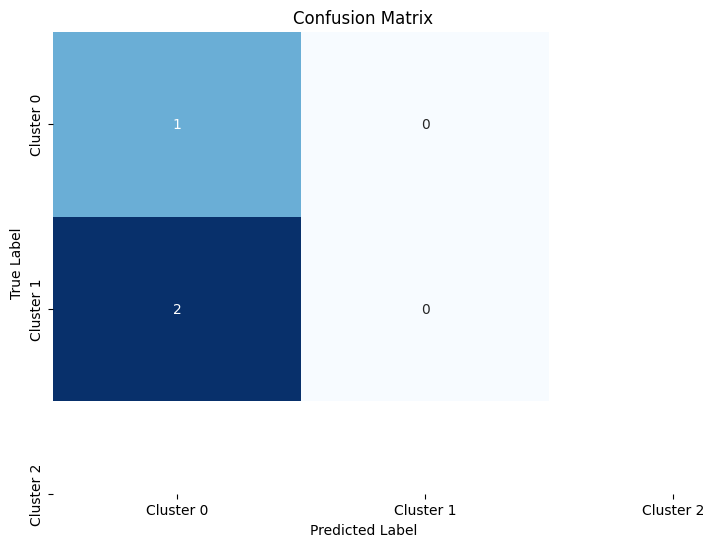

Accuracy: 0.3333333333333333
Confusion Matrix:
[[1 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [15]:
# Assuming your data has cluster assignments in 'cluster' column
X = features_pca  # Features after applying PCA
y = cluster_labels  # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

## family infertile

### PCA

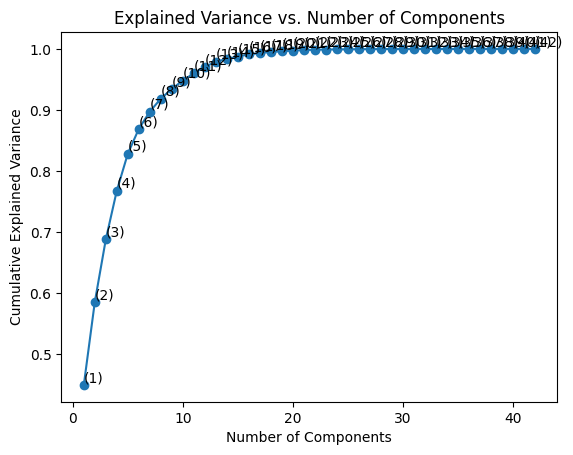

In [16]:
features = family_infertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [17]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=13)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

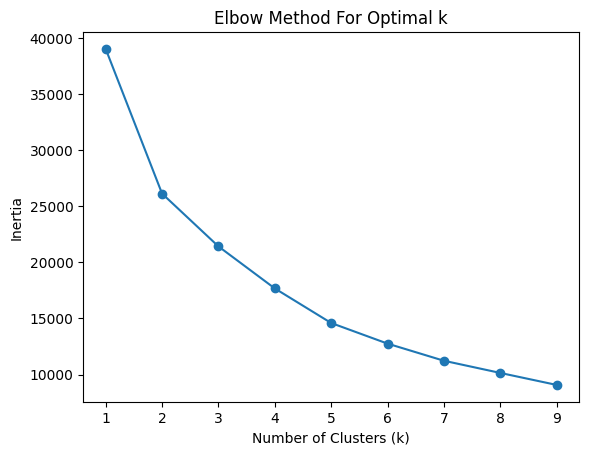

In [18]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8886/2907269575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_infertile['cluster'] = cluster_labels


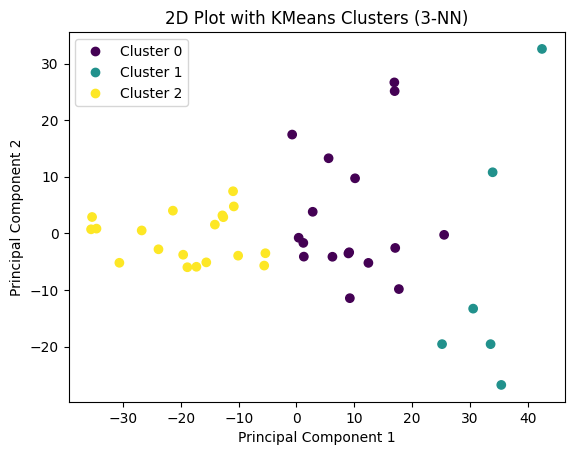

In [19]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
family_infertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [20]:
# see how many samples are in each cluster
family_infertile['cluster'].value_counts()

cluster
2    19
0    17
1     6
Name: count, dtype: int64

### Analysis

In [21]:
# statistics of each cluster
family_infertile.groupby('cluster').describe()

Peptoniphilaceae                                                    \
                   count       mean        std      min       25%      50%   
cluster                                                                      
0                   17.0  19.473718   7.497697   1.6004  13.45390  19.7614   
1                    6.0   2.992133   4.200367   0.0111   0.09830   1.2888   
2                   19.0  49.303121  10.189166  35.8518  40.69985  48.3592   

                           Campylobacteraceae            ...  \
              75%      max              count      mean  ...   
cluster                                                  ...   
0        25.11190  28.8934               17.0  9.043629  ...   
1         4.00345  10.7543                6.0  1.185750  ...   
2        55.51070  66.9373               19.0  3.635637  ...   

        Sporolactobacillaceae         Gemmataceae                           \
                          75%     max       count      mean       std  min   
cluster                                                                      
0                         0.0  0.0014        17.0  0.000018  0.000073  0.0   
1                         0.0  0.0000         6.0  0.000000  0.000000  0.0   
2                         0.0  0.0000        19.0  0.000000  0.000000  0.0   

                                
         25%  50%  75%     max  
cluster                         
0        0.0  0.0  0.0  0.0003  
1        0.0  0.0  0.0  0.0000  
2        0.0  0.0  0.0  0.0000  

[3 rows x 2336 columns]

### KNN

In [22]:
# Assuming your data has cluster assignments in 'cluster' column
X = family_infertile.iloc[:, 1:]  # Features
y = family_infertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8888888888888888
Confusion Matrix:
[[3 0]
 [1 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



## Fertility & Infertility

In [23]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
family['fertility'] = family['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
family['fertility'] = np.where(family['fertility'] == 'CON', 1, 0)

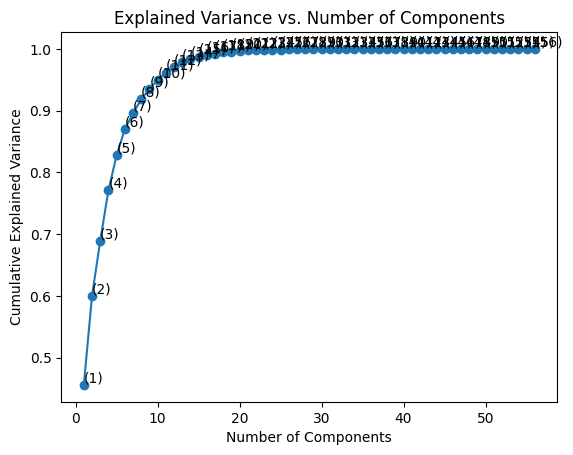

In [24]:
features = family.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [25]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=12)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

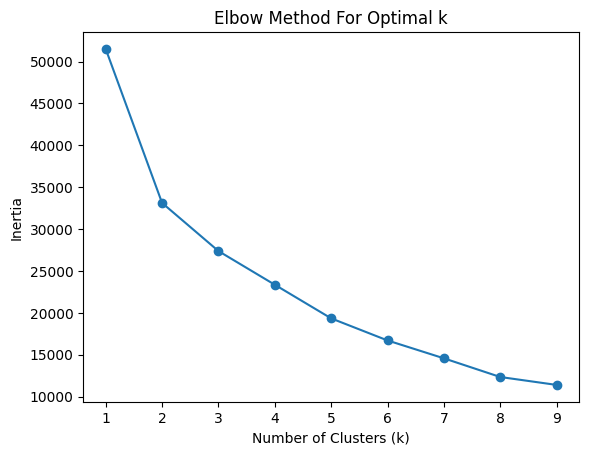

In [26]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


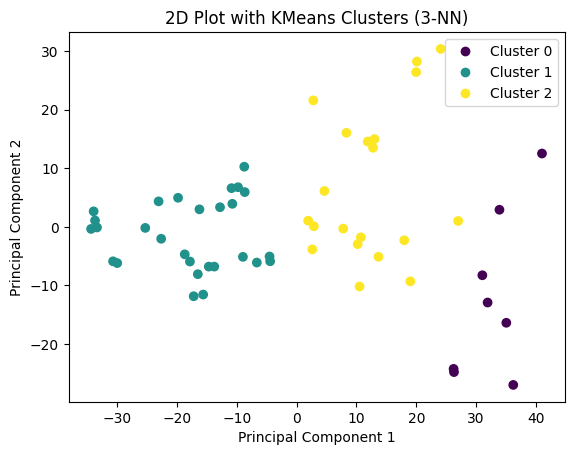

In [27]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
family['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

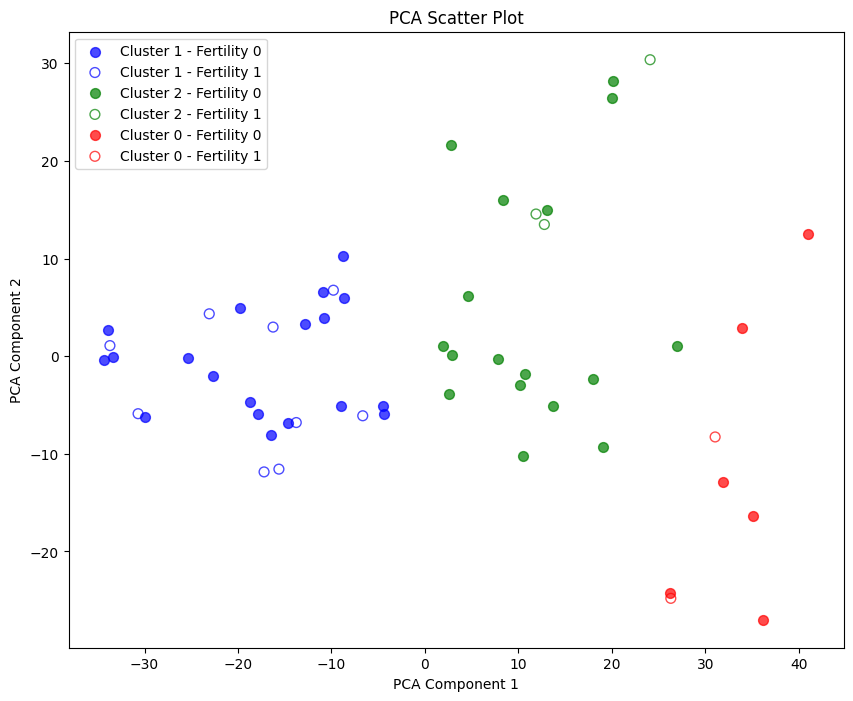

In [28]:
# Add the PCA components to the DataFrame
family['PCA1'] = features_pca[:, 0]
family['PCA2'] = features_pca[:, 1]

# Scatter plot with color based on cluster and shape based on fertility
plt.figure(figsize=(10, 8))

for cluster, color in zip(family['cluster'].unique(), ['blue', 'green', 'red']):
    for fertility, fill in zip(family['fertility'].unique(), [True, False]):
        subset = family[(family['cluster'] == cluster) & (family['fertility'] == fertility)]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster} - Fertility {fertility}',
                    color=color, marker='o', s=50, alpha=0.7, edgecolors=color, linewidth=1, facecolors='none' if not fill else color)

plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [29]:
family['cluster'].value_counts()

cluster
1    28
2    20
0     8
Name: count, dtype: int64

In [30]:
# statistics of each cluster and fertility
family.groupby(['cluster', 'fertility']).describe()

Peptoniphilaceae                                           \
                             count       mean        std      min       25%   
cluster fertility                                                             
0       0                      6.0   2.992133   4.200367   0.0111   0.09830   
        1                      2.0   7.239400   4.971244   3.7242   5.48180   
1       0                     19.0  49.303121  10.189166  35.8518  40.69985   
        1                      9.0  50.339922   9.227202  38.1819  45.58730   
2       0                     17.0  19.473718   7.497697   1.6004  13.45390   
        1                      3.0  14.803533   4.940152   9.1351  13.10950   

                                              Campylobacteraceae             \
                       50%       75%      max              count       mean   
cluster fertility                                                             
0       0           1.2888   4.00345  10.7543                6.0   1.185750   
        1           7.2394   8.99700  10.7546                2.0   4.127950   
1       0          48.3592  55.51070  66.9373               19.0   3.635637   
        1          48.4870  54.48790  65.8000                9.0   2.784122   
2       0          19.7614  25.11190  28.8934               17.0   9.043629   
        1          17.0839  17.63775  18.1916                3.0  20.751200   

                   ...       PCA1             PCA2                        \
                   ...        75%        max count       mean        std   
cluster fertility  ...                                                     
0       0          ...  35.923825  41.015474   6.0 -10.853439  15.555199   
        1          ...  29.862890  31.048457   2.0 -16.534031  11.686412   
1       0          ...  -9.862881  -4.428004  19.0  -0.675884   5.432160   
        1          ... -13.764675  -6.653480   9.0  -3.003677   6.942807   
2       0          ...  17.993348  27.005802  17.0   4.685587  12.133202   
        1          ...  18.434666  24.091722   3.0  19.469539   9.447864   

                                                                          
                         min        25%        50%        75%        max  
cluster fertility                                                         
0       0         -26.987336 -22.282296 -14.651645  -1.047627  12.508794  
        1         -24.797572 -20.665802 -16.534031 -12.402261  -8.270491  
1       0          -8.086940  -5.501627  -0.362309   3.632444  10.255480  
        1         -11.850403  -6.793581  -5.888421   2.981412   6.758169  
2       0         -10.188189  -2.957983   0.088430  14.974125  28.209813  
        1          13.487106  14.023614  14.560122  22.460755  30.361388  

[6 rows x 2352 columns]

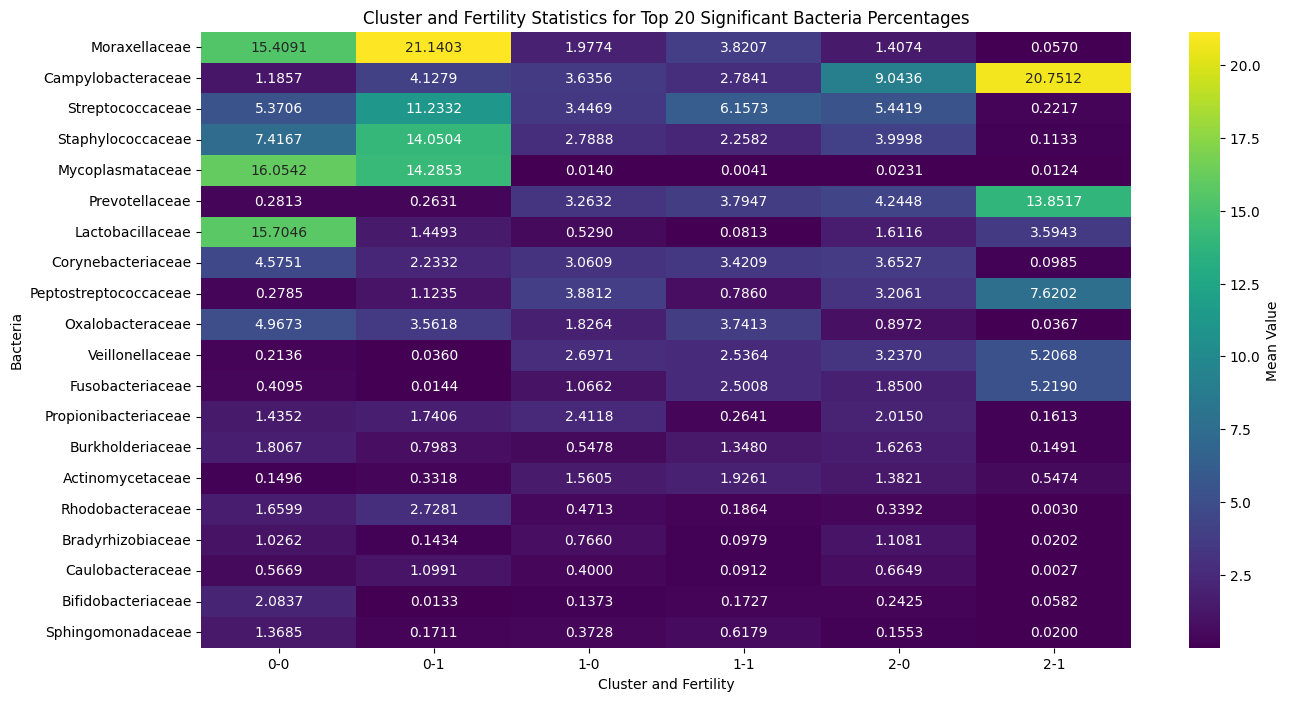

In [31]:
# Select relevant columns for visualization
columns_for_visualization = family.columns[2:293]  # Assuming bacteria percentage columns start from index 2

# Calculate the mean for each bacteria across clusters and fertility
mean_values = family.groupby(['cluster', 'fertility'])[columns_for_visualization].mean()

# Identify the top 20 significant columns based on mean values
top_columns = mean_values.mean(axis=0).nlargest(20).index

# Filter the original dataframe based on top columns
filtered_data = family[['cluster', 'fertility'] + list(top_columns)]

# Group by cluster and fertility, then calculate the mean for each bacteria
grouped_data = filtered_data.groupby(['cluster', 'fertility'])[top_columns].mean()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(grouped_data.transpose(), cmap='viridis', annot=True, fmt=".4f", cbar_kws={'label': 'Mean Value'})
plt.title('Cluster and Fertility Statistics for Top 20 Significant Bacteria Percentages')
plt.xlabel('Cluster and Fertility')
plt.ylabel('Bacteria')
plt.show()

In [32]:
# Add a new column for each combination of cluster and fertility
family['cluster_fertility'] = family['cluster'].astype(str) + '_' + family['fertility'].astype(str)
family.head(5)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae,fertility,cluster,PCA1,PCA2,cluster_fertility
0,UAB 17001,46.4265,0.6828,0.0650,6.7373,1.8859,1.6713,5.1440,0.3967,0.0650,...,0.0,0.0,0.0,0.0,0.0,0,1,-14.682931,-6.792980,1_0
1,UAB 17002,1.6004,0.0081,0.0866,0.3201,1.4494,0.0000,0.5536,0.0000,0.1490,...,0.0,0.0,0.0,0.0,0.0,0,2,27.005802,0.997599,2_0
2,UAB 17003,41.8100,6.9997,5.5466,0.1772,0.4794,20.7520,1.4129,1.0206,0.1556,...,0.0,0.0,0.0,0.0,0.0,0,1,-10.880325,6.598645,1_0
3,UAB 17004,19.7614,0.2237,0.8203,0.8203,6.4131,0.9694,6.7860,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0,2,10.203623,-2.957983,2_0
4,UAB 17005,49.7581,1.8944,10.5872,0.7384,8.2395,0.0611,7.7558,0.8453,0.1528,...,0.0,0.0,0.0,0.0,0.0,0,1,-17.833488,-5.927111,1_0


In [33]:
family['cluster_fertility'].value_counts()

cluster_fertility
1_0    19
2_0    17
1_1     9
0_0     6
2_1     3
0_1     2
Name: count, dtype: int64

### KNN

In [35]:
# Assuming your data has cluster assignments in 'cluster' column
X = family.iloc[:, 1:-1]  # Features

# Remove cluster and fertility columns
X.drop(['cluster', 'fertility'], axis=1, inplace=True)

y = family['cluster_fertility']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.75
Confusion Matrix:
[[5 0 0]
 [3 0 0]
 [0 0 4]]
Classification Report:
              precision    recall  f1-score   support

         1_0       0.62      1.00      0.77         5
         1_1       0.00      0.00      0.00         3
         2_0       1.00      1.00      1.00         4

    accuracy                           0.75        12
   macro avg       0.54      0.67      0.59        12
weighted avg       0.59      0.75      0.65        12



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

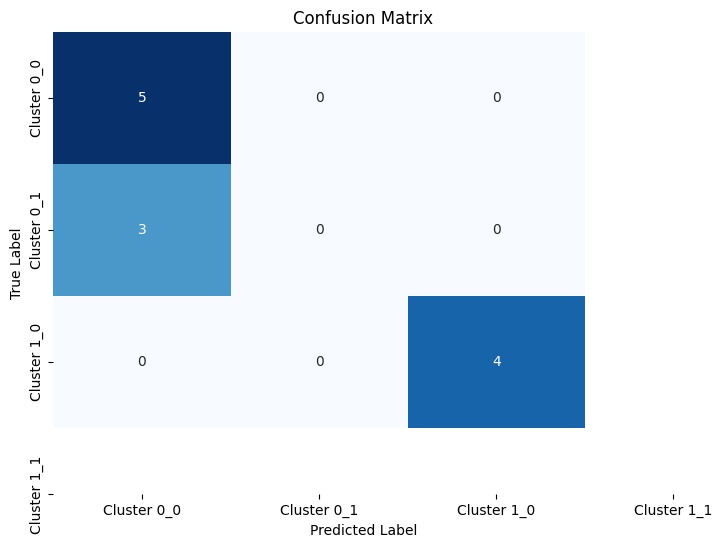

In [36]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Given a new input, mark why it is classified according to an specific cluster

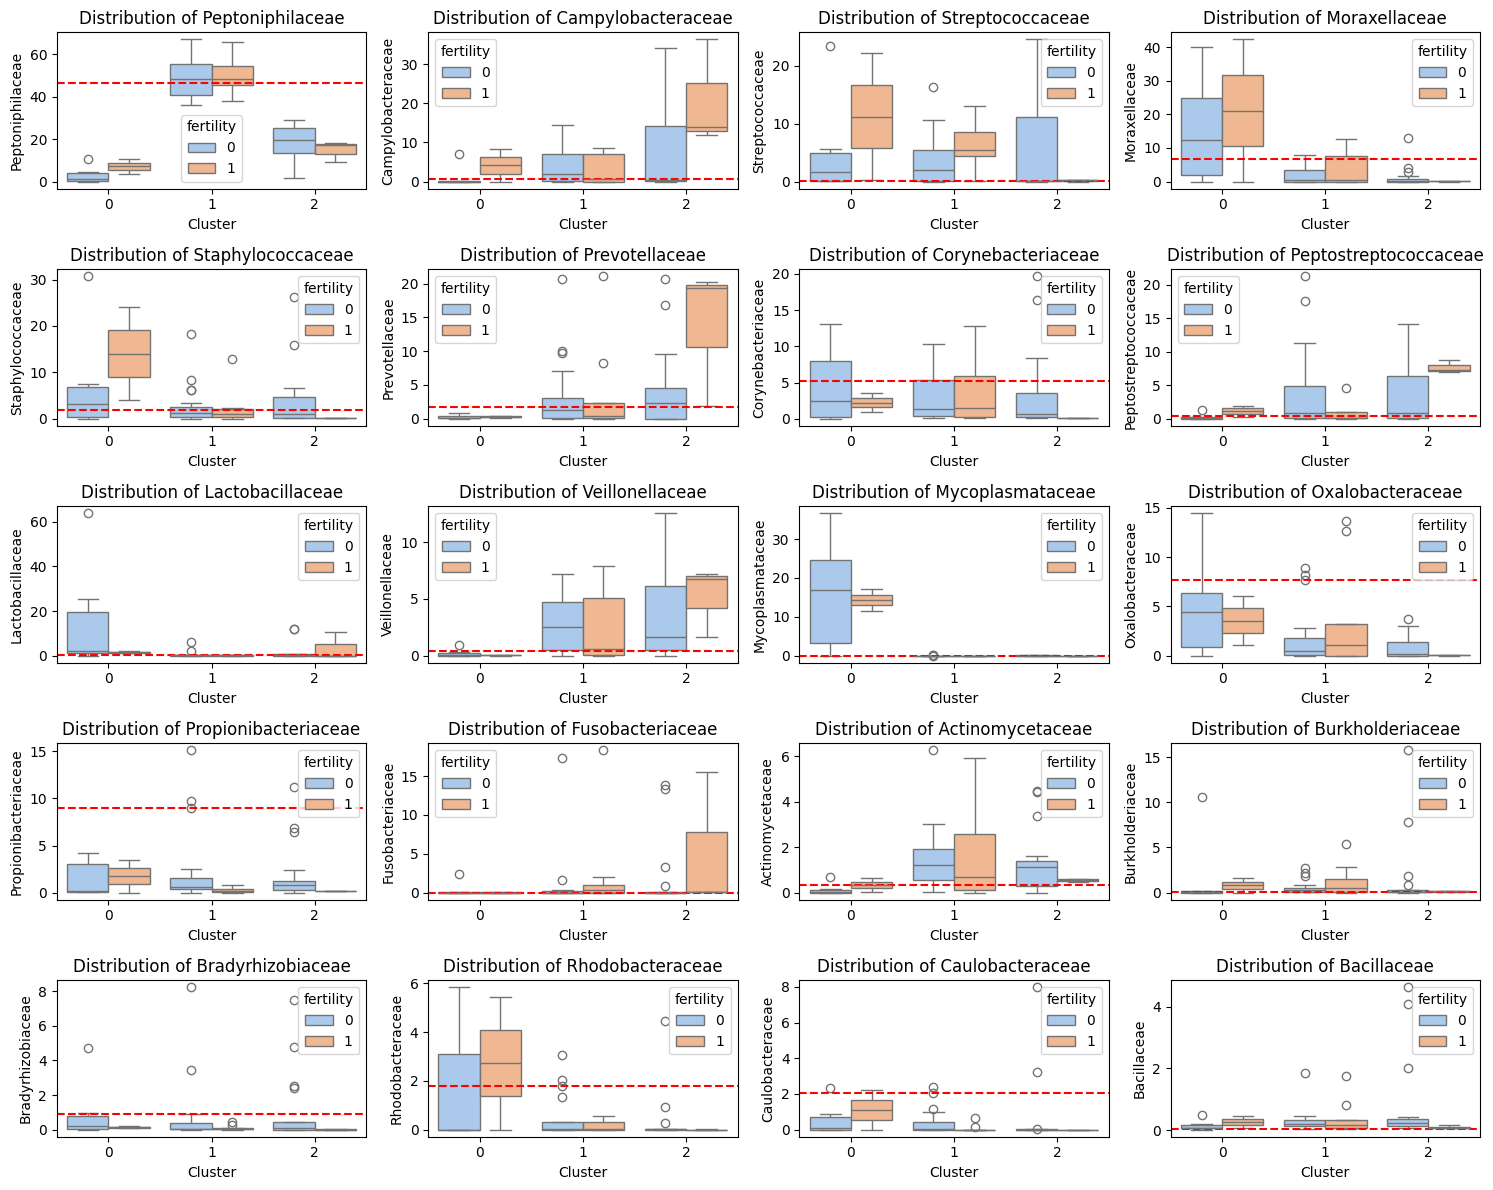

In [37]:
# Create a DataFrame with features and cluster labels
features_with_cluster = family

# Specify the number of rows and columns for the subplots
num_rows = 5  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Get the top 20 most significant features based on some criterion (e.g., feature importance)
top_features = features.columns[:20]

specific_value = family.iloc[0, 1:32]

# Plot box plots for each feature in each cluster, color-coded by fertility
for i, feature in enumerate(top_features):
    sns.boxplot(x='cluster', y=feature, hue='fertility', data=features_with_cluster, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

    # Mark the specific value in red
    axes[i].axhline(y=specific_value[feature], color='red', linestyle='--', label='Specific Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [38]:
# Print the cluster and fertility of the specific value
family.iloc[0, -2:]

PCA2                -6.79298
cluster_fertility        1_0
Name: 0, dtype: object

In [39]:
# save the KNN model
filename = 'family_knn'
pickle.dump(knn, open(filename, 'wb'))

In [40]:
# save family df
family.to_csv('family_clusters_fertility.csv', index=False)